In [ ]:
https://drive.google.com/file/d/1qmqR5REdBntdpODOsY6NROk2YMnC6Nrn/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/employe.csv")
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


PROBLEM STATEMENT
People Charm,a growing company is facing a high attrition rate among their employees which in turn affects their business due to the lack of expertise and experience.

-their HR department is assigned the task to reduce attrition rate by retaining employees who are about to churn out of the company

-they need to recommend special plans or strategies which will help them to retain their employees which inturn will help them to grow bigger as a company
-

In [ ]:
#EDA: Exploratory Data Analysis -check for null values, duplicates
df.isnull().sum() #df.dropna(inplace=True) if existed

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [ ]:
df.duplicated().sum() #3008 duplicated rows in the dataset

np.int64(3008)

In [ ]:
df[df.duplicated()] #refreshed post deleting dups

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   dept                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#plot a box plot separately for the columns avgMonthlyHours, numberOfProjects,timespent,timespent.company

<Axes: ylabel='avgMonthlyHours'>

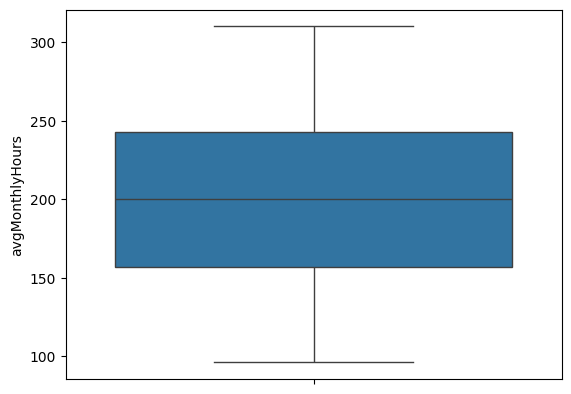

In [ ]:
sns.boxplot(df['avgMonthlyHours'])

<Axes: ylabel='numberOfProjects'>

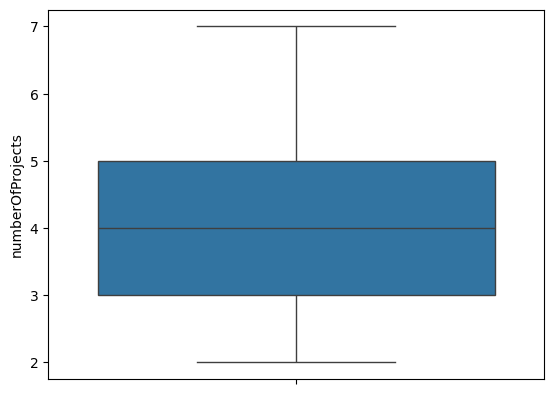

In [ ]:
sns.boxplot(df['numberOfProjects'])

<Axes: >

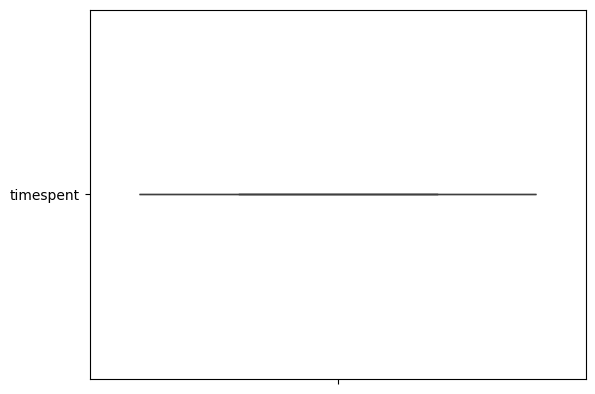

In [ ]:
sns.boxplot(['timespent'])

<Axes: ylabel='timeSpent.company'>

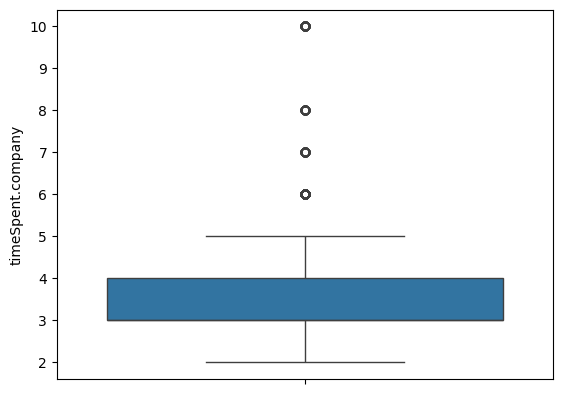

In [ ]:
sns.boxplot(df['timeSpent.company'])

In [ ]:
#outliers suggest extreme values

In [ ]:
#aim: to find out why people are about to leave the company

In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

<Axes: xlabel='numberOfProjects', ylabel='count'>

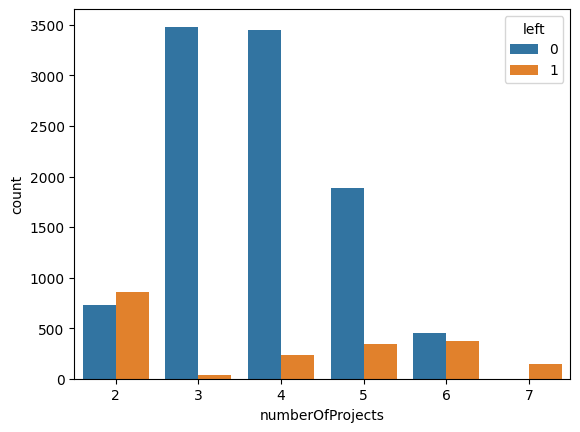

In [ ]:
sns.countplot(data=df,x='numberOfProjects', hue='left') #if left column is 0, that person is in the company, 1 means left the company
#countplot always takes one axis value, and shows its count on y axis

In [ ]:
# inference - people having 3 to 5 projects are staying more, so distribute 3 to 5 projects to each employee , not more or less to avoid burnout or boredom

In [ ]:
#countplot avgMonthlyHours, use hue for left column

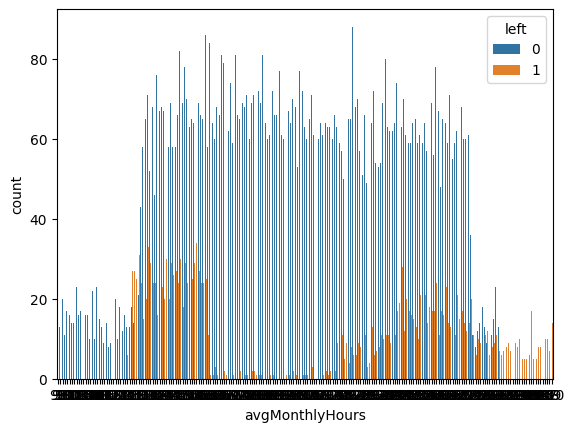

In [ ]:
sns.countplot(data=df,x='avgMonthlyHours', hue='left')
plt.show()

In [ ]:
# too much data, overlapping. trying histplot instead

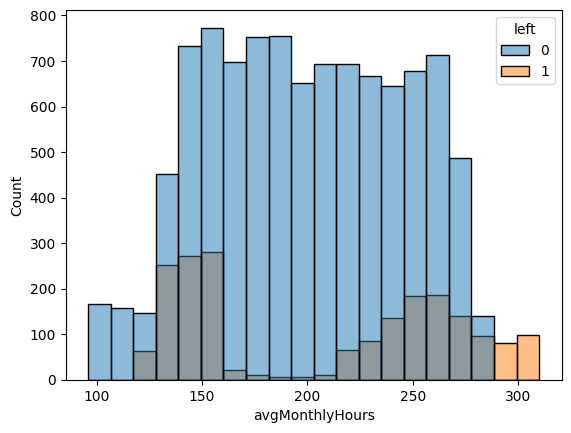

In [ ]:
sns.histplot(data=df,x='avgMonthlyHours', hue='left',bins=20)
plt.show()

In [ ]:
#grey part is orange part overlapping with the blue.

In [ ]:
#Inference: Most retention happens at average monthly hours of 200.Most preferable monthly working hours is between 100 to 200 hours. Avoid 300 since its causing people to leave

In [ ]:
# Plotting countplot, timeSpend.company, promotioninlast5years

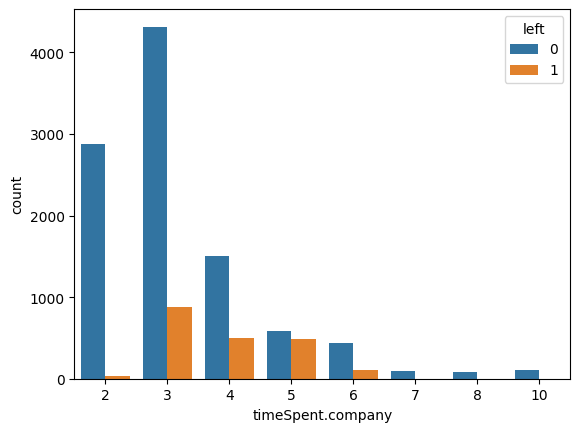

In [ ]:
sns.countplot(data=df,x='timeSpent.company', hue='left')
plt.show()

In [ ]:
# Inference: Employees are vulnerable to leave in the first 3 to 5 years of joining. Post that they get comfortable with the environment

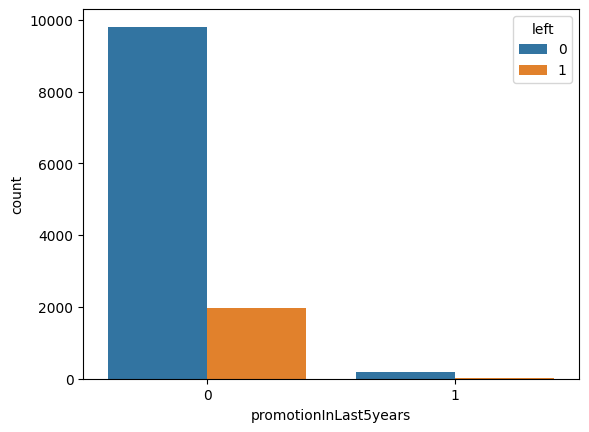

In [ ]:
sns.countplot(data=df,x='promotionInLast5years', hue='left')
plt.show()

In [ ]:
#inference: due to lack of proper promotions employees are tending to leave the company
#allocate promotions and hikes specially in 3 to 5 year period

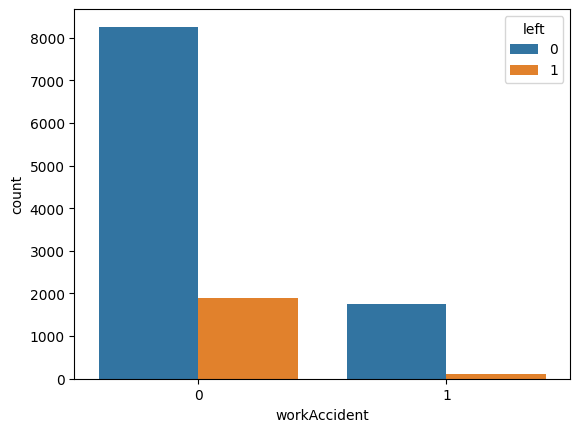

In [ ]:
sns.countplot(data=df,x='workAccident', hue='left') #workaccident is people who didnt deliver on their work at some points
plt.show()

In [ ]:
#INFERENCE:  improve work environment and safety measures, so that tension and mistakes reduce, employees are not on the edge.

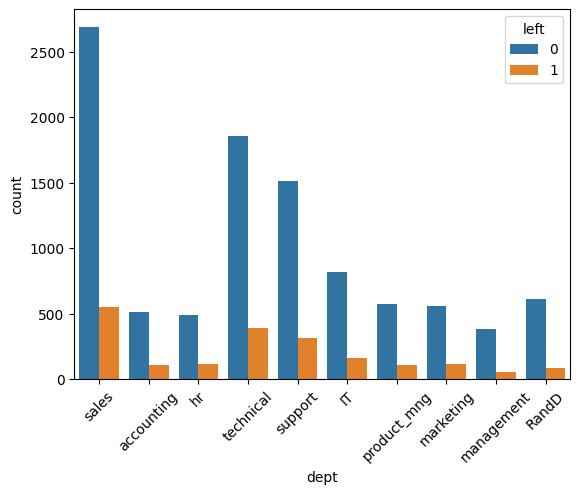

In [ ]:
sns.countplot(data=df,x='dept',hue='left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# INFERENCE: more people are there in sales, support and technical departments. Focus more on those to reduce attrition

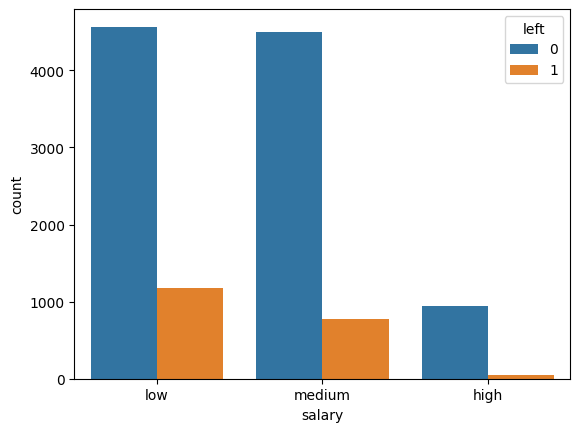

In [ ]:
sns.countplot(data=df,x='salary',hue='left')
plt.show()

In [ ]:
#Better give the appropriate salary for the deserving candidates since people with low salary are leaving the most

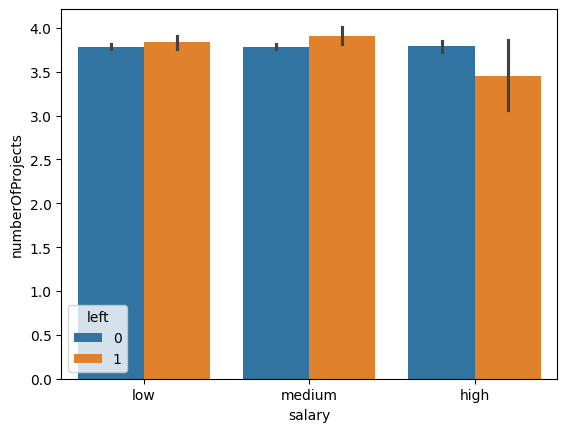

In [ ]:
sns.barplot(data=df, x='salary',y='numberOfProjects', hue='left')
plt.show()